In [1]:
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings




In [2]:
df = pd.read_csv('data\stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We are going take Math_Score as dependent feature and rest are Independent
* Dependent_feature : math_score
* Independent_feature : gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, reading_score, writing_score

We are going to predict math score 

## Preparing X and Y variables

In [4]:
x = df.drop(columns=['math_score'],axis = 1)

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [7]:
print('Categories in gender variable: ', end='')
print(df['gender'].unique())

print('Categories in race_ethnicity variable: ', end='')
print(df['race_ethnicity'].unique())

print('Categories in parental_level_of_education variable: ', end='')
print(df['parental_level_of_education'].unique())

print('Categories in lunch variable: ', end='')
print(df['lunch'].unique())

print('Categories in test_preparation_course variable: ', end='')
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


## Note

* As we have less number of feature and inside the categorical features there also we have less number of categorical feature
thus we can perform one hot encoding(OHE)
* If we have another categorical feature which has lots of category inside it the we will use TAGET GUIDED ORDINAL ENCODING

* Creating pipeline for categorical features:
    1. Need to perform OHE
    2. Once every feature converted into numerical feature, we need to perform standardization/ normalization

In [8]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer ##ColumnTransformer is responsible for trnasforming your column or your data

num_transformer = StandardScaler()
Ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",Ohe_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)


In [9]:
x = preprocessor.fit_transform(x)
x


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
x.shape

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=42)
x_train.shape,x_test.shape


((800, 19), (200, 19))

In [12]:
y_train.shape, y_test.shape

((800,), (200,))

## Create and evaluate function to give all metrics after all model training

In [13]:
def evaluate_model (true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse,r2_square

In [14]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(verbose=False),
    "Ada Boost Regressor": AdaBoostRegressor()
}

model_list =[]
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # model train

    #make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Evalute train and test dataset
    model_train_mae, model_train_mse,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model (y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))

    print('------------------------------')

    print('Model performance for testing set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
- Mean Squared Error: 28.3487
------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803
- Mean Squared Error: 29.1167


Lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
- Mean Squared Error: 43.4784
------------------------------
Model performance for testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
- Mean Squared Error: 42.5064


Ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
- Mean Squared Error: 28.3378
------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
- Mean Squared Err

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,Ada Boost Regressor,0.854126
5,Random Forest Regressor,0.851718
6,Cat Boost Regressor,0.851632
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.752197


## We will go with Linear Regression

In [16]:
linear_Reg = LinearRegression(fit_intercept=True)
linear_Reg = linear_Reg.fit(x_train,y_train)
y_pred  = linear_Reg.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


Text(0, 0.5, 'pred')

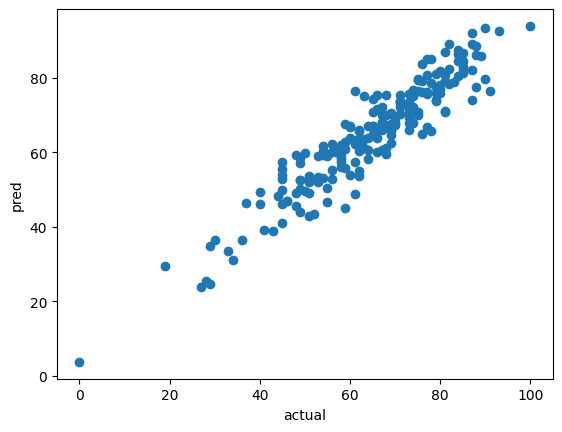

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('pred')

<Axes: xlabel='math_score'>

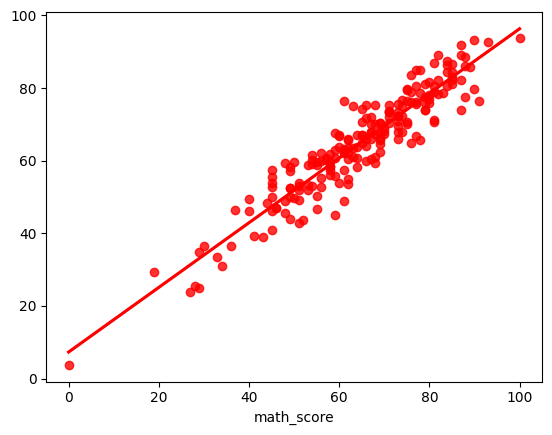

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

## Diffrence between actual and predicted value

In [19]:
pred_df = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
